In [1]:
from ncmcm import *
from IPython.display import display
import os
from pynwb import NWBHDF5IO
import pickle
import pandas as pd
os.chdir('..')
os.chdir('ncmcm')
print(os.getcwd())

/Users/michaelhofer/Documents/GitHub/ncmcm/ncmcm


In [2]:
''' 
This is data from the mouse brain.
'''
# Now you can import the script directly
filepath = "/Users/michaelhofer/Documents/Uni/Mouse_data/mouse_10/sub-10_ses-mouse-10-session-date-2017-09-21-area-V1-L23-multi-plane-imaging_behavior+ophys.nwb"
# Open the file in read mode "r", and specify the driver as "ros3" for S3 files
io = NWBHDF5IO(filepath, mode="r", load_namespaces=True)

nwbfile = io.read()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  return func(args[0], **pargs)


In [6]:
# convert the first PlaneSegmentation into dataframe and examine the information
planeSeg_0_df = nwbfile.processing['ophys']['ImageSegmentation']['PlaneSegmentation_0'].to_dataframe()
planeSeg_0_df.head(5)
#planeSeg_1_df = nwbfile.processing['ophys']['ImageSegmentation']['PlaneSegmentation_1'].to_dataframe()
#planeSeg_1_df.head(5)
#planeSeg_2_df = nwbfile.processing['ophys']['ImageSegmentation']['PlaneSegmentation_2'].to_dataframe()
#planeSeg_2_df.head(5)
#planeSeg_3_df = nwbfile.processing['ophys']['ImageSegmentation']['PlaneSegmentation_3'].to_dataframe()
#planeSeg_3_df.head(5)



,ml,ap,depth,area,mTagBFP2,mScarlet,pixel_mask
id,,,,,,,
0,-2.71753,-3.21788,0.11,V1,False,False,"[[229, 76, 91947.16], [230, 76, 130799.37], [2..."
1,-2.76642,-3.16481,0.11,V1,False,False,"[[264, 113, 45804.51], [265, 113, 64200.27], [..."
2,-3.02527,-3.00245,0.11,V1,False,False,"[[443, 226, 84415.805], [444, 226, 89784.02], ..."
3,-2.91319,-3.04176,0.11,V1,True,False,"[[367, 200, 7744.4453], [362, 201, 7726.138], ..."
4,-2.56678,-2.80399,0.11,V1,False,False,"[[138, 389, 93532.75], [139, 389, 125248.22], ..."


# INFORMATION
### The trial table contains basic information about trials:

* start_time: start time of this trial from session onset in second
* stop_time: stop time of this trial from session onset in second
* is_vis: whether the trial was a visually guided trial
* is_ruleA: whether the trial happened during rule A; rule A: BL & WR, rule B: WL & BR
* is_switch: whether a rule switch happened on the trial
* is_cueB: whether the trial had a black cue; True: black, False: white
* is_choL: whether the mouse made a left choice on the trial; True: left, False: right
* is_correct: whether the trial was correct

### ... about rules:

* association_mat: behavioral LSTM predicted conditional probability; order: P(R|W), P(L|W), P(R|B), P(L|B)
* rule_belief: the rule belief on the trial; directionality: positive: rule B, negative: rule A
* signed_bias: the singed choice bias on the trial; directionality: positive: left bias, negative: right bias
* rule_following: the rule-following on the trial; values between -0.5 ~ 0.5
* bias_following: the bias-following on the trial; between -0.5 ~ 0.5
* prob_actual_cho: the probability of actual choice on the trial, i.e. P(actual choice|actual cue)

### ... and other information:

* trial_onset_plane_frame_idx: for each imaging plane, the frame index for this trial's onset
* trial_offset_plane_frame_idx: for each imaging plane, the frame index for this trial's offset

In [8]:
# convert trial table into dataframe and examine it
trial_df = nwbfile.trials.to_dataframe()
trial_df.iloc[0:20]

,start_time,stop_time,is_vis,is_ruleA,is_switch,is_cueB,is_choL,is_correct,association_mat,rule_belief,signed_bias,rule_following,bias_following,prob_actual_cho,trial_onset_plane_frame_idx,trial_offset_plane_frame_idx
id,,,,,,,,,,,,,,,,
0,27.40725,38.93475,False,True,False,False,False,True,"[0.1915447860956192, 0.808455228805542, 0.1745...",0.017014,0.633925,0.008507,-0.316962,0.191545,"[95, 95, 95, 95, 94]","[132, 132, 132, 132, 132]"
1,38.95450,53.71500,True,True,False,False,False,True,"[0.4683721661567688, 0.5316278338432312, 0.381...",0.087143,0.150398,0.043571,-0.075199,0.468372,"[165, 164, 164, 164, 164]","[221, 221, 221, 220, 220]"
2,53.73325,67.30600,False,True,False,False,False,True,"[0.5884299874305725, 0.4115700125694275, 0.568...",0.020030,-0.156830,0.010015,0.078415,0.588430,"[253, 253, 253, 253, 252]","[302, 302, 302, 302, 302]"
3,67.32600,79.86375,False,True,False,False,False,True,"[0.6695836782455444, 0.3304162919521332, 0.633...",0.036280,-0.302887,0.018140,0.151444,0.669584,"[335, 334, 334, 334, 334]","[378, 378, 377, 377, 377]"
4,79.88150,93.72075,False,True,False,False,False,True,"[0.740466296672821, 0.25953370332717896, 0.670...",0.069668,-0.411264,0.034834,0.205632,0.740466,"[410, 410, 410, 409, 409]","[461, 461, 460, 460, 460]"
5,93.74100,108.77025,False,True,False,True,False,False,"[0.7668509483337402, 0.23314903676509857, 0.68...",0.080717,-0.452985,-0.040358,0.226493,0.686134,"[493, 493, 493, 492, 492]","[540, 540, 540, 539, 539]"
6,108.79675,125.56775,False,True,False,True,False,False,"[0.625546932220459, 0.37445303797721863, 0.504...",0.120789,-0.130305,-0.060394,0.065152,0.504758,"[583, 583, 583, 583, 582]","[641, 641, 640, 640, 640]"
7,125.58625,141.22050,True,True,False,True,True,True,"[0.6251654624938965, 0.37483450770378113, 0.50...",0.118504,-0.131827,0.059252,-0.065914,0.493338,"[684, 684, 684, 683, 683]","[746, 745, 745, 745, 745]"
8,141.24025,154.78025,False,True,False,True,True,True,"[0.6613848209381104, 0.3386152386665344, 0.493...",0.167746,-0.155024,0.083873,-0.077512,0.506361,"[778, 778, 777, 777, 777]","[827, 827, 827, 826, 826]"


In [11]:
proc = nwbfile.processing
bhv = proc['behavior']
different_data = list(bhv.data_interfaces.keys())

t = bhv.data_interfaces['frame_aligned_position'].spatial_series['frame_aligned_forward_and_lateral_position'].data
pos = bhv['frame_aligned_position']['frame_aligned_forward_and_lateral_position']
vel = bhv['frame_to_verm_index_conversion']

start = pos.data[2458,:]
time = pos.timestamps

In [12]:
# extract data from deconvolved_activity_plane_0 and 
imaging_timestamps_0 = nwbfile.processing['ophys']['deconvolved_activity_plane_0'].timestamps
print(np.asarray(imaging_timestamps_0)[:15])

deconv_0 = nwbfile.processing['ophys']['deconvolved_activity_plane_0'].data[:]
df_0 = nwbfile.processing['ophys']['df_over_f_plane_0']['dF_over_F_plane_0'].data[:]
x = nwbfile.processing['ophys']['df_over_f_plane_0']['dF_over_F_plane_0']
print(imaging_timestamps_0.shape, deconv_0.shape, df_0.shape)

[11.7525 11.9195 12.086  12.253  12.4195 12.5865 12.753  12.92   13.0865
 13.2535 13.42   13.587  13.7535 13.9205 14.087 ]
<class 'pynwb.ophys.RoiResponseSeries'>
(37748,) (37748, 131) (37748, 131)


In [15]:
print('\nChange in fluorescence (df/F) on plane 0 for each neuron (only 7 neurons & 3 timesteps shown)')
print(pd.DataFrame(df_0).iloc[:, 0:7].head(3))
print('\nDeconvolved neural activity (actual firing) on plane 0 for each neuron (only 7 neurons & 3 timesteps shown)')
print(pd.DataFrame(deconv_0).iloc[:, 0:7].head(3))
print('\nTimestamp of each recording (only 3 timesteps shown)')
print(pd.DataFrame(imaging_timestamps_0).head(3))


Change in fluorescence (df/F) on plane 0 for each neuron (only 7 neurons & 3 timesteps shown)
          0         1         2         3         4         5         6
0  5.507079  0.155855  3.353462  0.000000  0.175119  0.161585  0.152486
1  5.716812  0.262697  3.244025  0.064592  0.000000  0.106101  0.313019
2  6.299069  0.127754  3.052517  0.237151  0.031268  0.016284  0.185410

Deconvolved neural activity (actual firing) on plane 0 for each neuron (only 7 neurons & 3 timesteps shown)
          0    1         2    3    4    5    6
0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0
1  0.858316  0.0  0.322156  0.0  0.0  0.0  0.0
2  1.257271  0.0  0.224131  0.0  0.0  0.0  0.0

Timestamp of each recording (only 3 timesteps shown)
         0
0  11.7525
1  11.9195
2  12.0860


In [3]:
deconv_0 = nwbfile.processing['ophys']['deconvolved_activity_plane_0'].data[:]
deconv_1 = nwbfile.processing['ophys']['deconvolved_activity_plane_1'].data[:]
deconv_2 = nwbfile.processing['ophys']['deconvolved_activity_plane_2'].data[:]
deconv_3 = nwbfile.processing['ophys']['deconvolved_activity_plane_3'].data[:]
imaging_timestamps_0 = nwbfile.processing['ophys']['deconvolved_activity_plane_0'].timestamps
imaging_timestamps_1 = nwbfile.processing['ophys']['deconvolved_activity_plane_1'].timestamps
imaging_timestamps_2 = nwbfile.processing['ophys']['deconvolved_activity_plane_2'].timestamps
imaging_timestamps_3 = nwbfile.processing['ophys']['deconvolved_activity_plane_3'].timestamps

print('Shape of neuronal data for each imaging Plane')
print(deconv_0.T.shape) # Neurons | Timesteps 
print(deconv_1.T.shape) # Neurons | Timesteps 
print(deconv_2.T.shape) # Neurons | Timesteps 
print(deconv_3.T.shape) # Neurons | Timesteps 

Shape of neuronal data for each imaging Plane
(131, 37748)
(137, 37748)
(98, 37748)
(78, 37748)


In [4]:
deconv = np.concatenate((deconv_0, deconv_1, deconv_2, deconv_3), axis=1)

print('Shape of timestamps for each imaging Plane')
print(imaging_timestamps_0.shape)
print(imaging_timestamps_1.shape)
print(imaging_timestamps_2.shape)
print(imaging_timestamps_3.shape)

Shape of timestamps for each imaging Plane
(37748,)
(37748,)
(37748,)
(37748,)


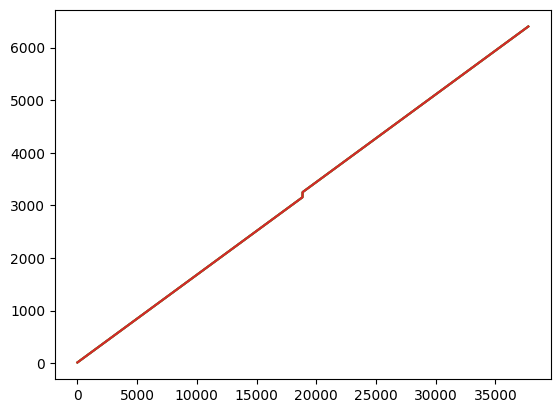

In [5]:
plt.plot(list(imaging_timestamps_0))
plt.plot(list(imaging_timestamps_1))
plt.plot(list(imaging_timestamps_2))
plt.plot(list(imaging_timestamps_3))
plt.show()

In [6]:
time_diffs_0 = np.diff(imaging_timestamps_0)
mean_time_step_0 = np.mean(time_diffs_0)
time_diffs_1 = np.diff(imaging_timestamps_1)
mean_time_step_1 = np.mean(time_diffs_1)
time_diffs_2 = np.diff(imaging_timestamps_2)
mean_time_step_2 = np.mean(time_diffs_2)
time_diffs_3 = np.diff(imaging_timestamps_3)
mean_time_step_3 = np.mean(time_diffs_3)

In [7]:
bhv = nwbfile.processing['behavior']
pos = bhv['frame_aligned_position']['frame_aligned_forward_and_lateral_position']
print(pos.data)

<HDF5 dataset "data": shape (188740, 2), type "<f8">


In [8]:
# Assuming pos.data is a NumPy array with shape (188740, 2)
# and imaging_timestamps is a NumPy array with shape (37748,)
forward_threshold = 0.0001  
lateral_threshold = 0.00001   

# Initialize an empty array to store behaviors
movements = np.zeros(imaging_timestamps_0.shape)

# Loop through imaging timestamps and categorize behaviors
for i, timestamp in enumerate(imaging_timestamps_0):
    # Calculate the index directly from the pattern (every 5th index)
    index = i * 5
    
    # Get the forward and lateral positions at the current index
    forward_pos, lateral_pos = pos.data[index]

    # Get the forward and lateral positions at the previous index
    prev_forward_pos, prev_lateral_pos = pos.data[index - 1]
    
    # Calculate changes in forward and lateral positions
    forward_change = forward_pos - prev_forward_pos
    lateral_change = lateral_pos - prev_lateral_pos
        
    # Categorize behaviors based on changes
    if np.abs(forward_change) < forward_threshold and np.abs(lateral_change) < lateral_threshold:
        movements[i] = 0
    elif forward_change > forward_threshold:
        movements[i] = 1
    elif forward_change < -forward_threshold:
        movements[i] = 2
    elif lateral_change > lateral_threshold:
        movements[i] = 3
    elif lateral_change < -lateral_threshold:
        movements[i] = 4
    else:
        movements[i] = 5

# Now, the 'behaviors' array contains the categorized behaviors for each frame in imaging timestamps.
print(movements.shape)
states = ['standing still', 'moving forward', 'moving backward', 'going right', 'going left', 'invisible']
print(np.unique(movements, return_counts=True))


(37748,)
(array([0., 1., 2., 3., 4., 5.]), array([  330, 22046,  1569,    34,    21, 13748]))


In [9]:
def create_behavior_choice(timestamps, starts, stops, corrects, switches):
    behavior = np.zeros(timestamps.shape) 
    states = ['none', 'smart', 'followed rule', 'was deceived', 'dumb']
    counter = 0
    for b_idx, time in enumerate(timestamps):
        if counter == len(corrects): 
            behavior[b_idx] = 0
            continue
        if starts[counter] < time < stops[counter]:
            if corrects[counter] and switches[counter]:
                behavior[b_idx] = 1
            elif corrects[counter]:
                behavior[b_idx] = 2
            elif switches[counter]:
                behavior[b_idx] = 3
            else:
                behavior[b_idx] = 4


        else:
            behavior[b_idx] = 0
        if time > stops[counter]:
                counter += 1 
    return behavior, states

In [10]:
trial_df = nwbfile.trials.to_dataframe()
starts = np.asarray(trial_df['start_time'])
stops = np.asarray(trial_df['stop_time'])
corrects = np.asarray(trial_df['is_correct'])
switches = np.asarray(trial_df['is_switch'])
went_left = np.asarray(trial_df['is_choL'])
rule_A = np.asarray(trial_df['is_ruleA'])
cue_B = np.asarray(trial_df['is_cueB'])


behavior_0, s0 = create_behavior_choice(imaging_timestamps_0, starts, stops, corrects, switches)
behavior_1, s1 = create_behavior_choice(imaging_timestamps_1, starts, stops, corrects, switches)
behavior_2, s2 = create_behavior_choice(imaging_timestamps_2, starts, stops, corrects, switches)
behavior_3, s3 = create_behavior_choice(imaging_timestamps_3, starts, stops, corrects, switches)

print(np.unique(behavior_0))
print(behavior_0.shape)
print(np.unique(behavior_1))
print(behavior_1.shape)
print(np.unique(behavior_2))
print(behavior_2.shape)
print(np.unique(behavior_3))
print(behavior_3.shape)

[0. 1. 2. 3. 4.]
(37748,)
[0. 1. 2. 3. 4.]
(37748,)
[0. 1. 2. 3. 4.]
(37748,)
[0. 1. 2. 3. 4.]
(37748,)


B has to be transformed into a integer-array. Translation is accessed by'self.states'.


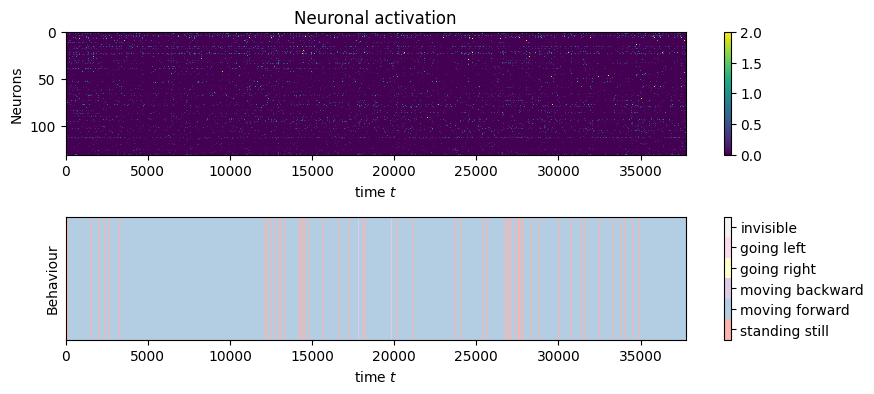

In [11]:
mouse_plane0_complete = Database(neuron_traces=deconv_0.T, 
                                 behavior=movements,
                                 behavioral_states=states,
                                 fps=mean_time_step_0)
mouse_plane0_complete.plotting_neuronal_behavioral()


In [12]:
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
mouse_plane0_complete.fit_model(logreg, ensemble=True)

Accuracy for full training data: 0.8884179294267246


True

Testing markovianity - repetition  1
Clusters: 0
Clusters: 1
Clusters: 2
Clusters: 3
Clusters: 4
Testing markovianity - repetition  2
Clusters: 0
Clusters: 1
Clusters: 2
Clusters: 3
Clusters: 4


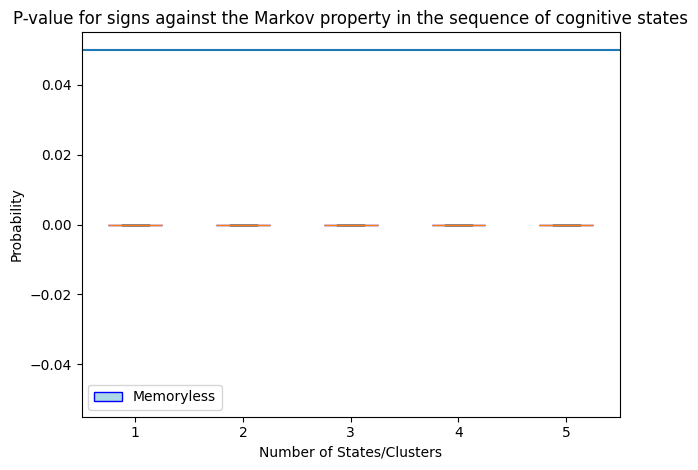

True

In [13]:
mouse_plane0_complete.cluster_BPT(nrep=2, max_clusters=5)

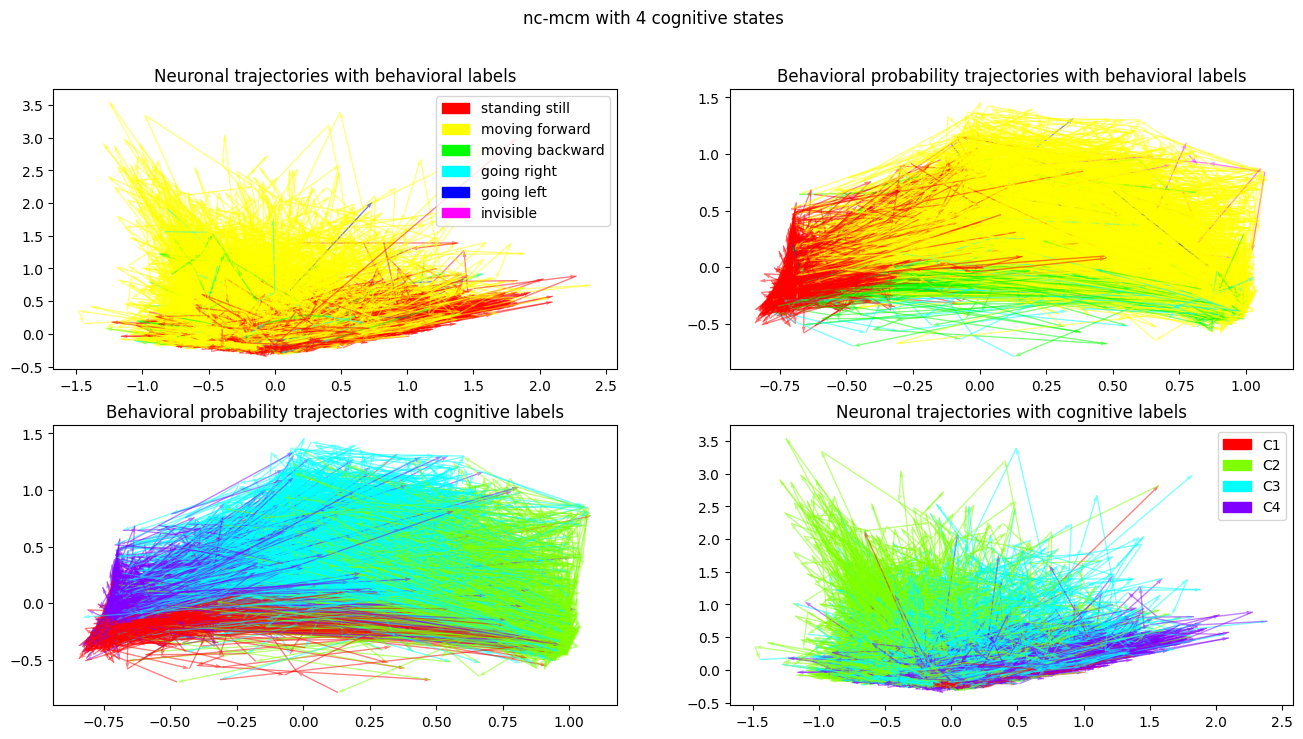

True

In [14]:
mouse_plane0_complete.step_plot(clusters=4)

Calcualted threshold is:  0.002
Clustering was chosen according to best p-memorylessness.


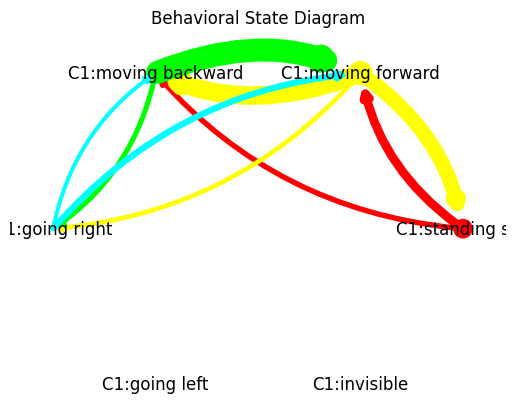

Mouse_plane0_1Cog.html
Plot has been saved under: /Users/michaelhofer/Documents/Uni/THESIS/Plots/Mouse_plane0_1Cog.html


True

In [18]:
os.chdir('/Users/michaelhofer/Documents/Uni/THESIS/Plots')
mouse_plane0_complete.behavioral_state_diagram(cog_stat_num=1, interactive=True)

In [19]:
mouse_plane0_vs = mouse_plane0_complete.createVisualizer(epochs=3000)

Losses 0.003264 0.000014 0.003278: 100%|██████████| 3000/3000 [47:58<00:00,  1.04it/s]


Points have coordinate shape:  (37733, 3)
Accuracy of BundDLeNet: 0.993


In [25]:
%matplotlib notebook
mouse_plane0_vs.plot_mapping(show_legend=True, quivers=True)

<IPython.core.display.Javascript object>

True

In [26]:
mouse_plane0_vs.make_comparison(show_legend=True, quivers=True)

<IPython.core.display.Javascript object>

True

In [27]:
mouse_plane0_vs.plot_loss()

<IPython.core.display.Javascript object>